## Predicting HDFC Bank stock prices using Time series analysis

### Introduction
Ever since I was a child, I have seen my father be involved in the stock market. Which often involved fighting for the remote on my days off and him telling me to come after 3pm. Those strange looking wiggly lines always boggled my mind and I couldn't comprehend what was so special about those? Even now as I am older, the whole concept of trading and stocks seems a bit elusive to me. However, due to my control freak tendencies and the urge to know everything before it happens and exactly how it happens, the stock market seemed the perfect subject to practice on. After reading a few articles, and asking my dad which kind of stocks are the most stable, I got to know its generally those related to the banking sector. The following could be the reasons:

* Regulations by government
* Dividend payments that attract regular investors
* Dependent on economy, if it is stable then bank stays stable

Due to its relatively stable nature, I believe it will be perfect for ARIMA. I will divide the data into training and testing set, in order to validate my predictions.  

In [28]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from sklearn.metrics import mean_squared_error

In [29]:
cd C:\Users\Hp\Desktop\Data analysis

C:\Users\Hp\Desktop\Data analysis


In [30]:
df= pd.read_excel("HDFCBANK.NS.xlsx", parse_dates=["Date"],index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-24,962.849976,1007.724976,957.500000,1003.025024,967.848206,32111100
2018-10-01,1004.900024,1026.099976,970.075012,982.650024,948.187744,30740750
2018-10-08,982.500000,998.549988,958.799988,990.924988,956.172485,36243770
2018-10-15,995.000000,1009.099976,979.000000,983.875000,949.369812,19900058
2018-10-22,1007.000000,1010.000000,974.500000,980.599976,946.209656,51417414


In [31]:
df.loc["2018"].Close.mean()

1015.6683268666665

In [32]:
df.loc["2019"].Close.mean()

1169.0014320384614

In [33]:
df.loc["2020-05"].Close.mean()

901.925003

<AxesSubplot:xlabel='Date'>

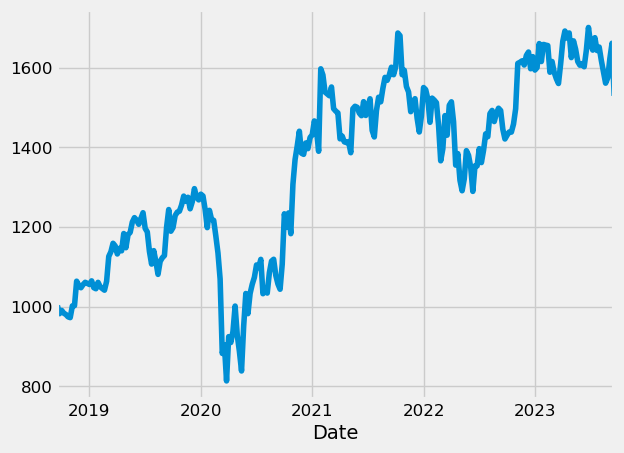

In [34]:
%matplotlib inline
df.Close.plot()

The prices were showing a steady increase until 2020, where a sharp fall is noticed. This can be attributed to the regular lockdowns that were issued in March end by the GOI in order to curb the spread of COVID19. Its impacts can be seen in May 2020, where the prices hit an all time low with an average price of 901.9 Rs. 

In [35]:
cols= ['Open', 'Low', 'High', 'Adj Close','Volume']
df.drop(cols,axis=1, inplace=True )

In [36]:
df['2020-05']

,Close
Date,
2020-05-04,929.049988
2020-05-11,888.150024
2020-05-18,838.849976
2020-05-25,951.650024


In [37]:
df.index

DatetimeIndex(['2018-09-24', '2018-10-01', '2018-10-08', '2018-10-15',
               '2018-10-22', '2018-10-29', '2018-11-05', '2018-11-12',
               '2018-11-19', '2018-11-26',
               ...
               '2023-07-17', '2023-07-24', '2023-07-31', '2023-08-07',
               '2023-08-14', '2023-08-21', '2023-08-28', '2023-09-04',
               '2023-09-11', '2023-09-18'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

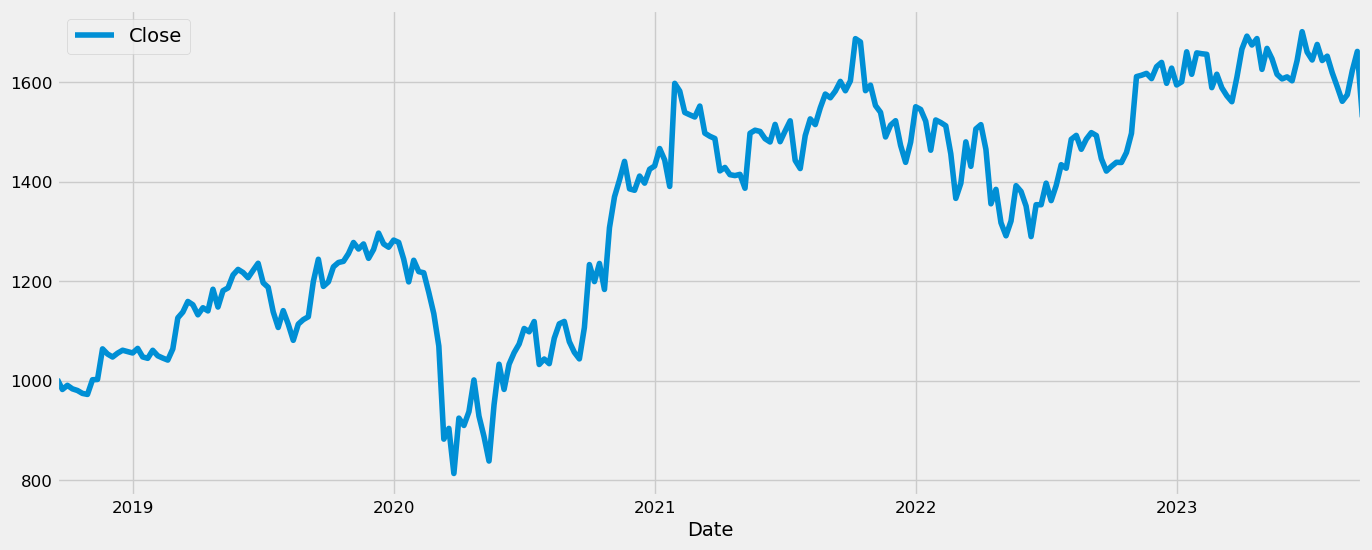

In [38]:
df.plot(figsize=(15, 6))
plt.show()

In [39]:
train_percentage = 0.8


split_index = int(len(df) * train_percentage)


train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]


print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

Training set size: 208
Testing set size: 53


<AxesSubplot:xlabel='Date'>

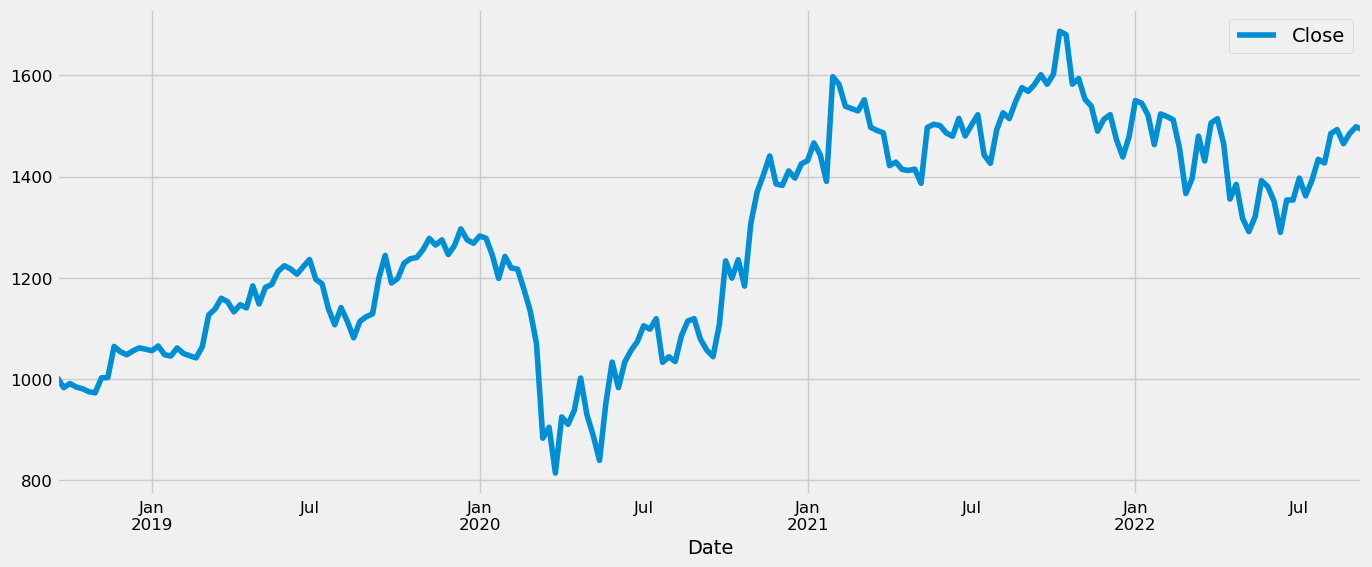

In [40]:
train_data.plot(figsize=(15,6))

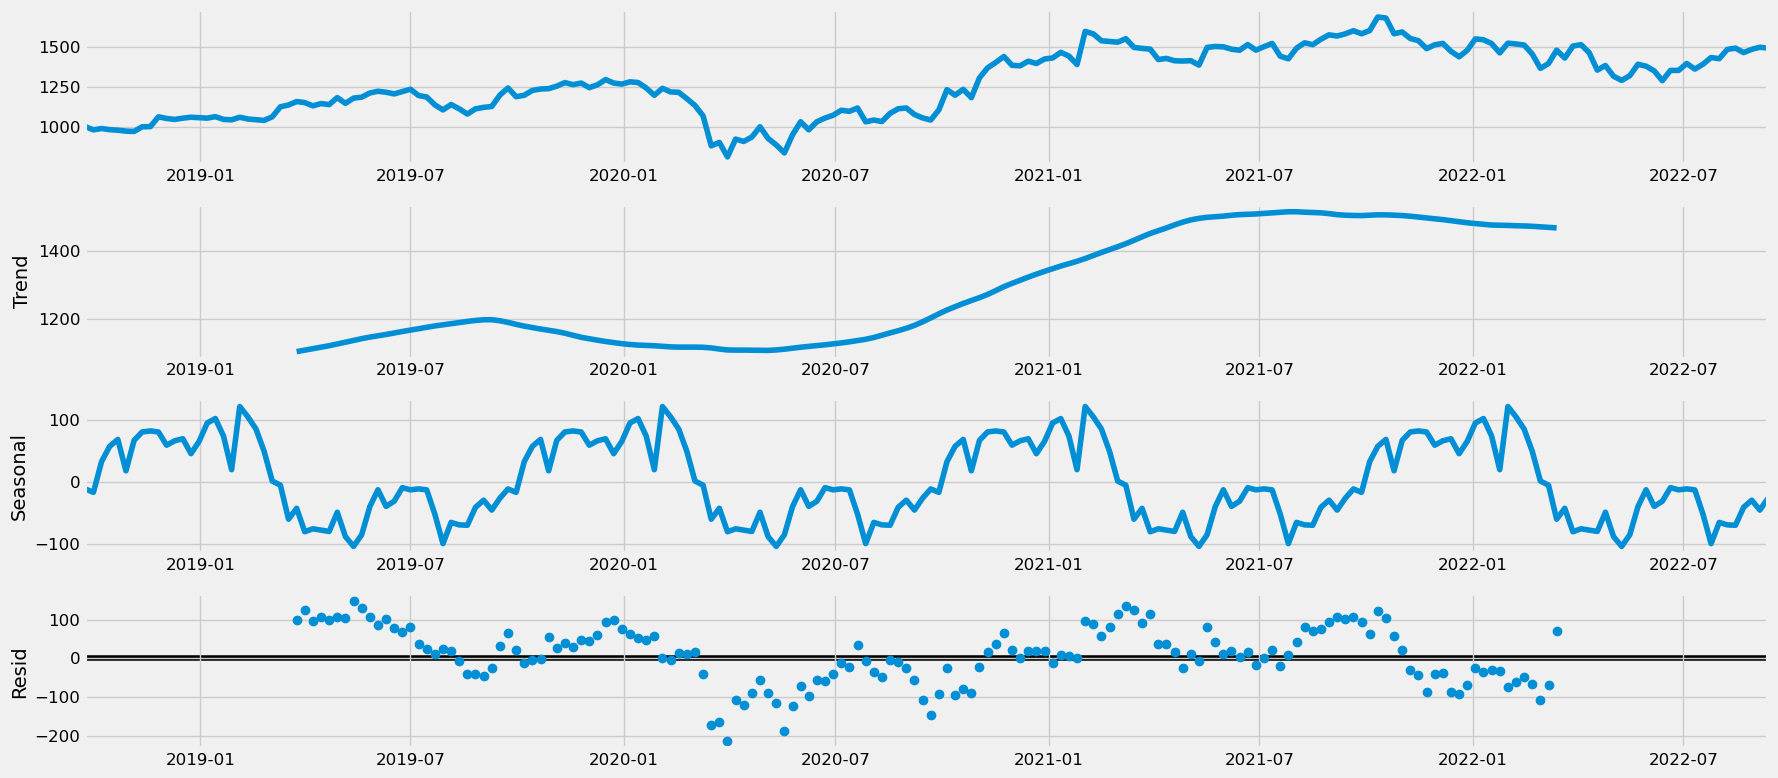

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_data, model='additive')
fig = decomposition.plot()
plt.show()

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 18) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 18)
SARIMAX: (0, 0, 1) x (0, 1, 0, 18)
SARIMAX: (0, 1, 0) x (0, 1, 1, 18)
SARIMAX: (0, 1, 0) x (1, 0, 0, 18)


In [62]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}18 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 18)18 - AIC:3556.94461114006
ARIMA(0, 0, 0)x(0, 0, 1, 18)18 - AIC:3045.0303279577247
ARIMA(0, 0, 0)x(0, 1, 0, 18)18 - AIC:2495.4794206629695
ARIMA(0, 0, 0)x(0, 1, 1, 18)18 - AIC:2266.9415089408803
ARIMA(0, 0, 0)x(1, 0, 0, 18)18 - AIC:2506.577314200197
ARIMA(0, 0, 0)x(1, 0, 1, 18)18 - AIC:2461.6949641324636
ARIMA(0, 0, 0)x(1, 1, 0, 18)18 - AIC:2281.6068144794035
ARIMA(0, 0, 0)x(1, 1, 1, 18)18 - AIC:2263.982275722313
ARIMA(0, 0, 1)x(0, 0, 0, 18)18 - AIC:3264.8966735779895
ARIMA(0, 0, 1)x(0, 0, 1, 18)18 - AIC:2788.9607815623367
ARIMA(0, 0, 1)x(0, 1, 0, 18)18 - AIC:2315.9290244581
ARIMA(0, 0, 1)x(0, 1, 1, 18)18 - AIC:2092.490703324855
ARIMA(0, 0, 1)x(1, 0, 0, 18)18 - AIC:2339.8210642948457
ARIMA(0, 0, 1)x(1, 0, 1, 18)18 - AIC:2268.9183649797196
ARIMA(0, 0, 1)x(1, 1, 0, 18)18 - AIC:2122.9809648696964
ARIMA(0, 0, 1)x(1, 1, 1, 18)18 - AIC:2092.9907886539336
ARIMA(0, 1, 0)x(0, 0, 0, 18)18 - AIC:2156.330728542782
ARIMA(0, 1, 0)x(0, 0, 1, 18)18 - AIC:1984.6697709849905
A

In [106]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 18),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0593      0.072     -0.824      0.410      -0.201       0.082
ma.S.L18      -1.0000      0.090    -11.128      0.000      -1.176      -0.824
sigma2      2085.6748   4.31e-05   4.84e+07      0.000    2085.675    2085.675


In [ ]:

100 010

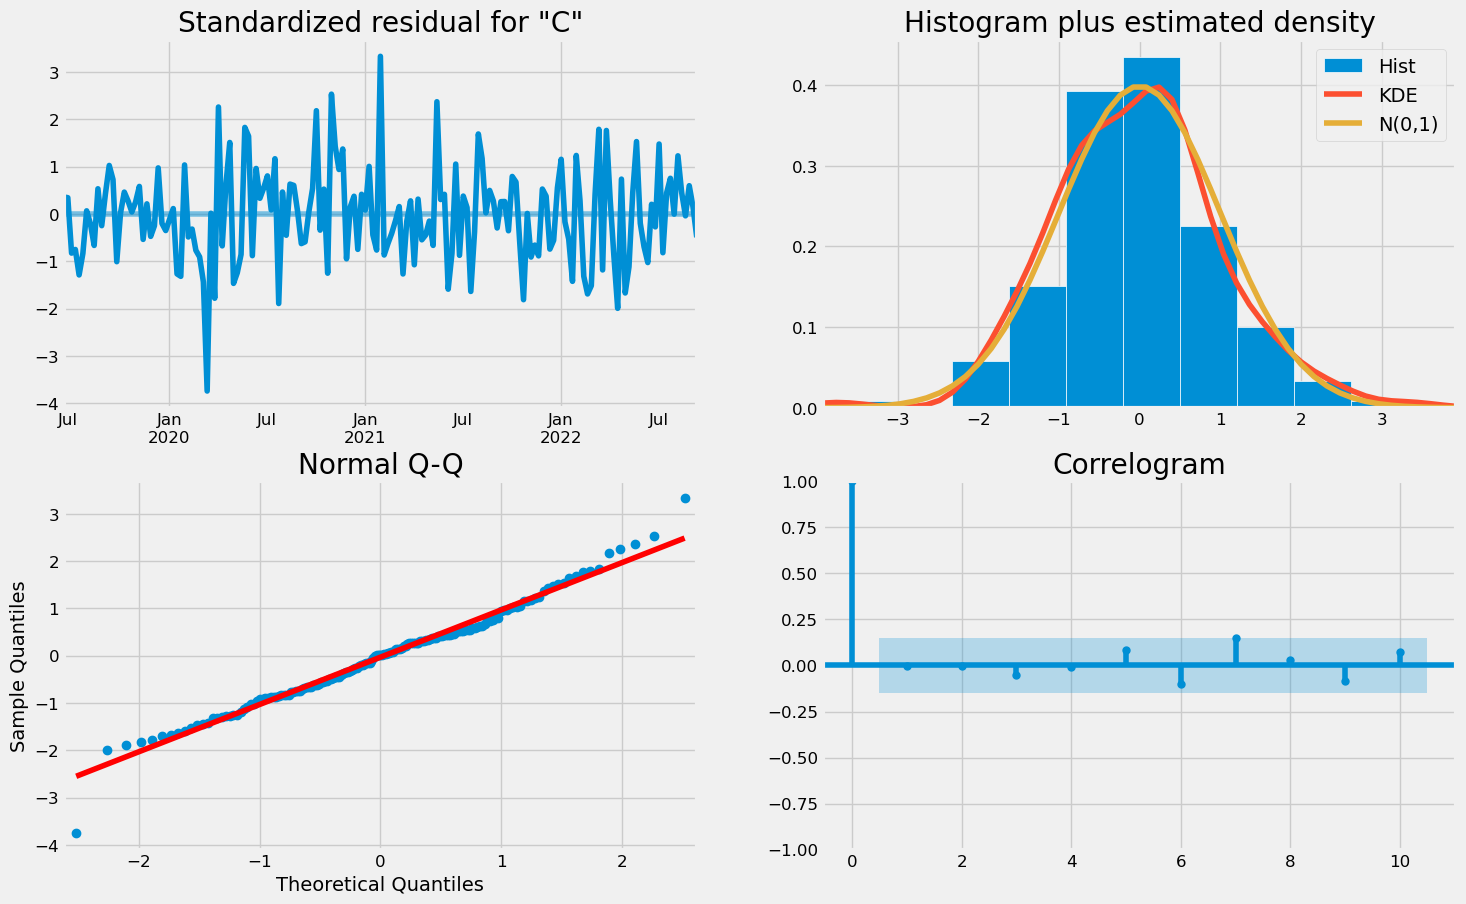

In [107]:
results.plot_diagnostics(figsize=(16, 10))
plt.show()

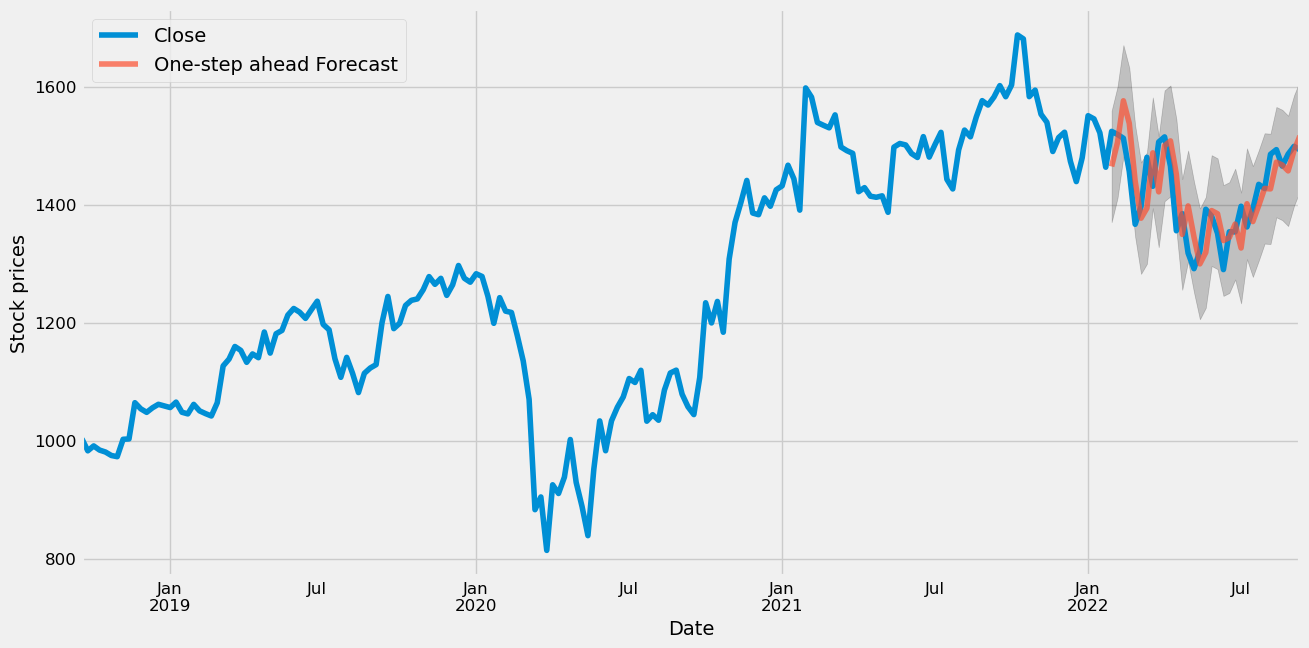

In [109]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = train_data['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock prices')

plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 67.2590969829029


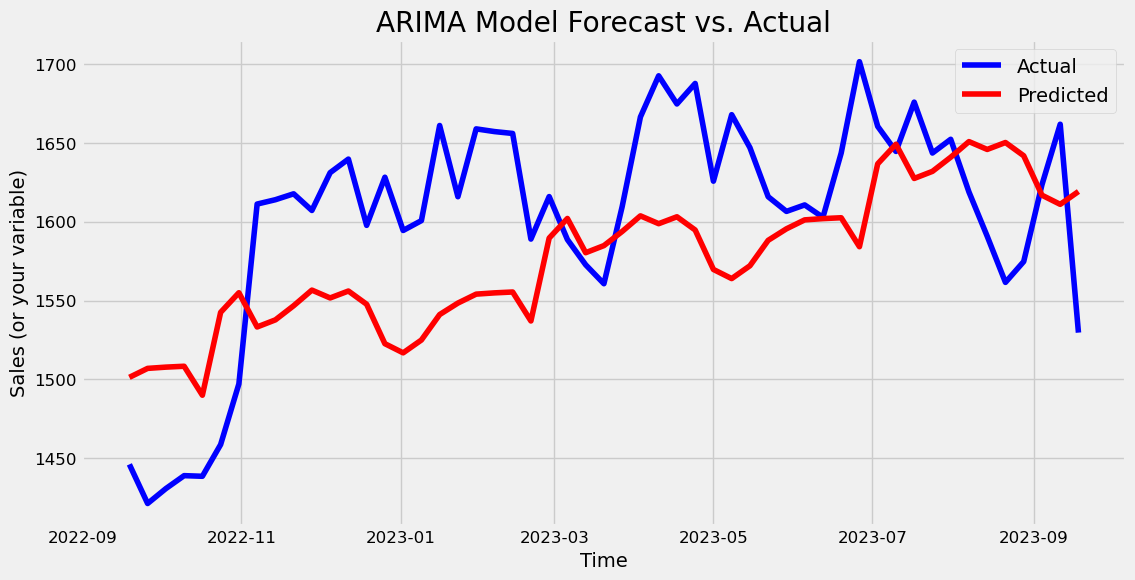

In [110]:

# Generate forecasts for the testing set
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start_idx, end=end_idx, typ='levels')

# Calculate RMSE as an evaluation metric
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Sales (or your variable)')
plt.title('ARIMA Model Forecast vs. Actual')
plt.legend()
plt.show()


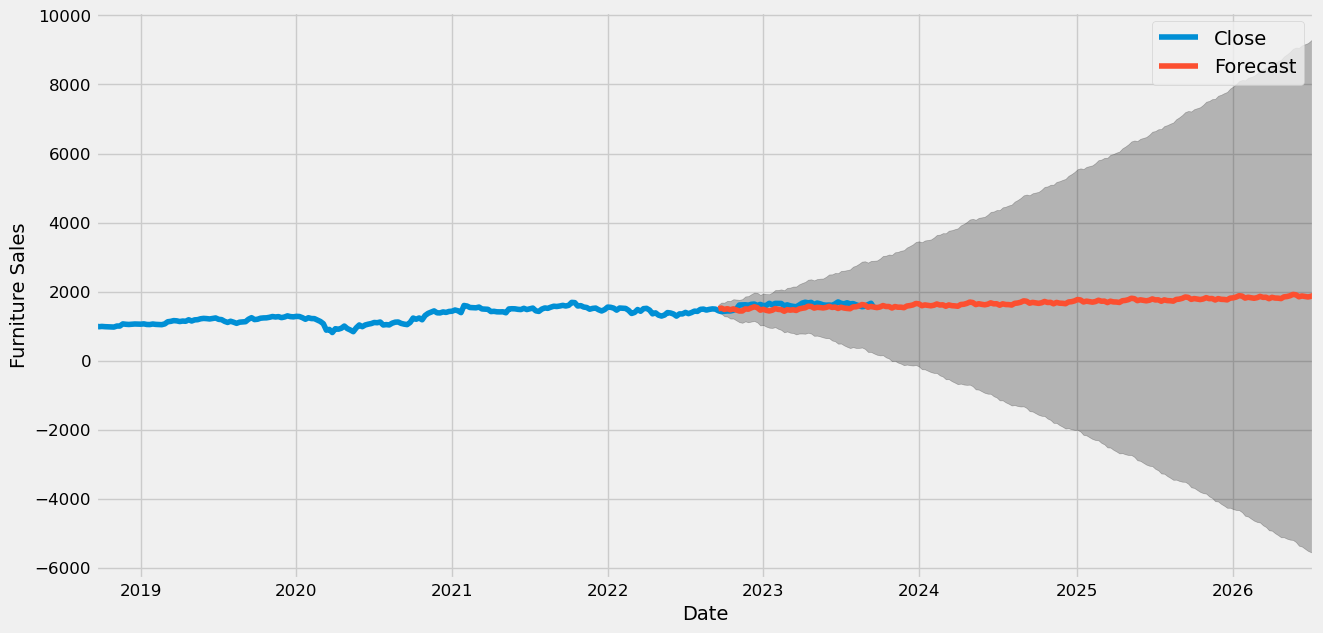

In [85]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()